In [265]:
import pandas as pd
import matplotlib.pyplot as plt

In [266]:
data = pd.read_csv('../consolidated_dataset/consolidated.csv')

In [267]:
target = 'price_change'
seventy_percent = int(len(data['price_change']) * 0.8)

data_train = data.loc[:seventy_percent - 1]
data_test = data.loc[seventy_percent:]

y_train = data_train.price_change
x_train = data_train.drop(columns=['price_change'])

y_test = data_test.price_change
x_test = data_test.drop(columns=['price_change'])

In [268]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

poly = PolynomialFeatures(degree = 2)

x_train = poly.fit_transform(x_train)
x_test = poly.transform(x_test)

In [269]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(x_train, y_train)

LogisticRegression()

In [270]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo.predict(x_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_pred=y_pred, y_true=y_test)))
print("Precision: {:.3f}".format(precision_score(y_pred=y_pred, y_true=y_test)))
print("Recall: {:.3f}".format(recall_score(y_pred=y_pred, y_true=y_test)))
print("F1 Score: {:.3f}".format(f1_score(y_pred=y_pred, y_true=y_test)))

Accuracy: 0.575
Precision: 0.500
Recall: 0.706
F1 Score: 0.585


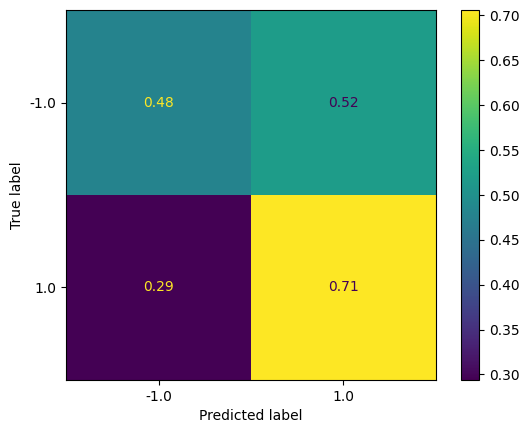

In [271]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

In [272]:
# Cross validation